In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import csv
import numpy as np
import pandas as pd

data = pd.read_csv("C:/Users/sepals04/Desktop/Pro. New/CLAASIFICATION/diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             

In [3]:
print(data.shape)

(768, 9)


In [4]:
types = data.dtypes
print(types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [5]:
from pandas import set_option

set_option("display.width", 150)
set_option("precision", 3)
description = data.describe()
print(description)

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  DiabetesPedigreeFunction      Age  Outcome
count      768.000  768.000        768.000        768.000  768.000  768.000                   768.000  768.000  768.000
mean         3.845  120.895         69.105         20.536   79.799   31.993                     0.472   33.241    0.349
std          3.370   31.973         19.356         15.952  115.244    7.884                     0.331   11.760    0.477
min          0.000    0.000          0.000          0.000    0.000    0.000                     0.078   21.000    0.000
25%          1.000   99.000         62.000          0.000    0.000   27.300                     0.244   24.000    0.000
50%          3.000  117.000         72.000         23.000   30.500   32.000                     0.372   29.000    0.000
75%          6.000  140.250         80.000         32.000  127.250   36.600                     0.626   41.000    1.000
max         17.000  199.000        122.0

In [6]:
class_counts = data.groupby("Outcome").size()
print(class_counts)

Outcome
0    500
1    268
dtype: int64


In [7]:
set_option("display.width", 100)
set_option("precision", 3)
correlations  = data.corr(method="pearson")
print(correlations)

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074  0.018   
Glucose                         0.129    1.000          0.153          0.057    0.331  0.221   
BloodPressure                   0.141    0.153          1.000          0.207    0.089  0.282   
SkinThickness                  -0.082    0.057          0.207          1.000    0.437  0.393   
Insulin                        -0.074    0.331          0.089          0.437    1.000  0.198   
BMI                             0.018    0.221          0.282          0.393    0.198  1.000   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184    0.185  0.141   
Age                             0.544    0.264          0.240         -0.114   -0.042  0.036   
Outcome                         0.222    0.467          0.065          0.075    0.131  0.293   

                          DiabetesPedig

In [8]:
skew = data.skew()
print(skew)

Pregnancies                 0.902
Glucose                     0.174
BloodPressure              -1.844
SkinThickness               0.109
Insulin                     2.272
BMI                        -0.429
DiabetesPedigreeFunction    1.920
Age                         1.130
Outcome                     0.635
dtype: float64


In [9]:
from matplotlib import pyplot

data.hist(figsize = (12,10))
pyplot.show

<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

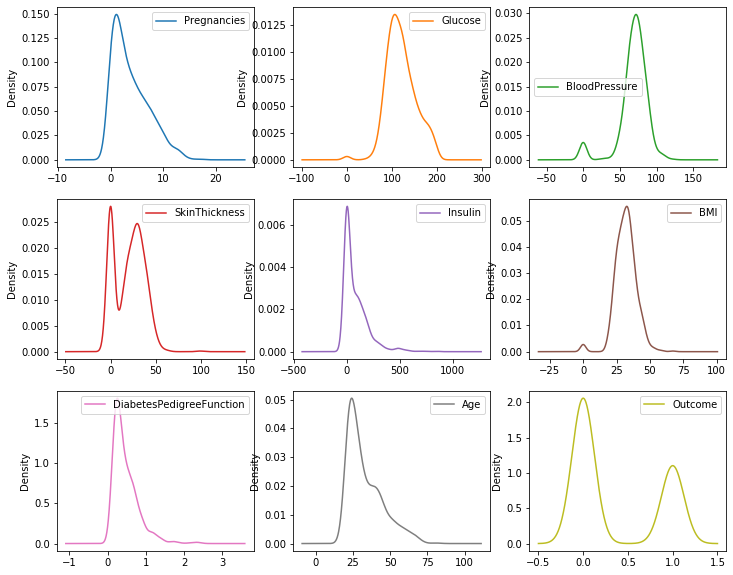

In [10]:
data.plot(kind='density',subplots=True, layout=(3,3), sharex=False, figsize=(12,10))
pyplot.show

<function matplotlib.pyplot.show(*args, **kw)>

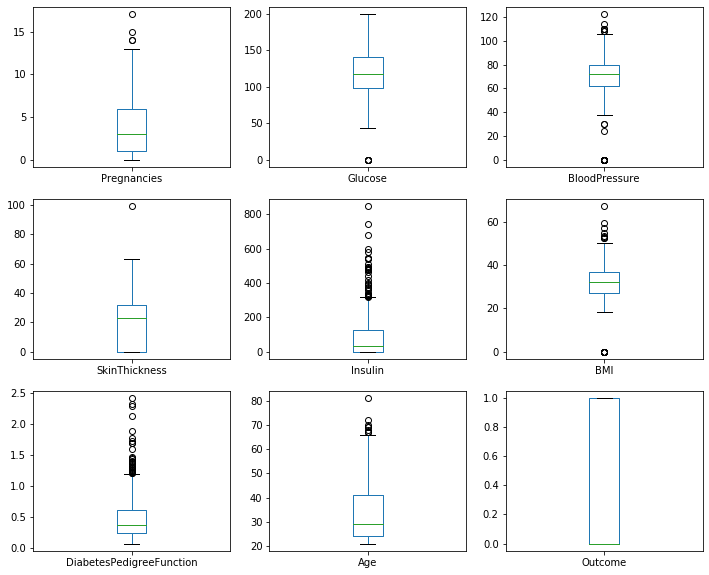

In [11]:
data.plot(kind='box', subplots=True ,layout=(3,3), sharex=False, sharey=False, figsize=(12,10))
pyplot.show

<function matplotlib.pyplot.show(*args, **kw)>

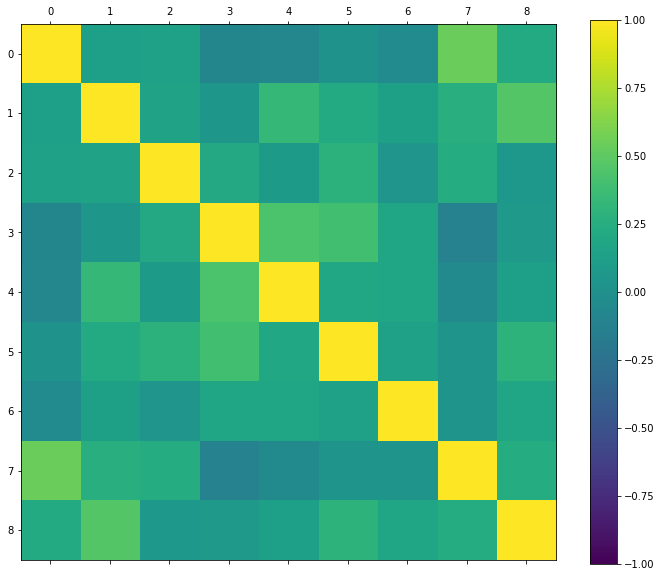

In [12]:
correlatons = data.corr()
fig = pyplot.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show

<function matplotlib.pyplot.show(*args, **kw)>

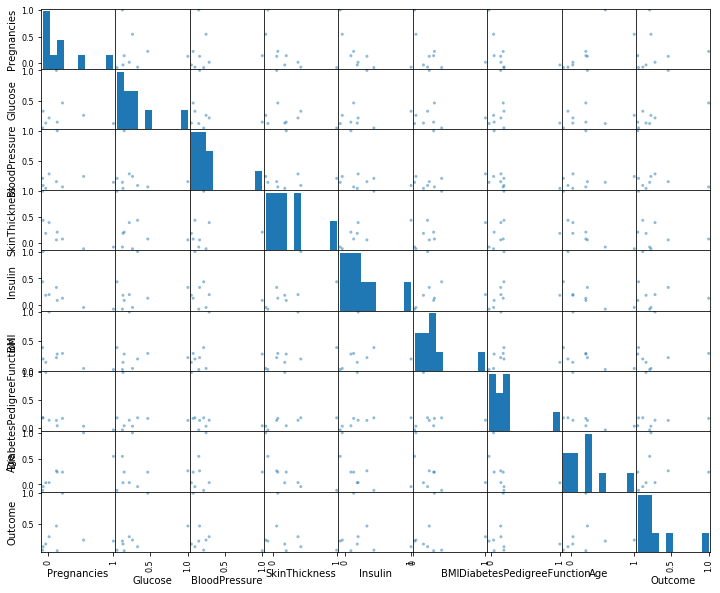

In [13]:
import pandas
from pandas.plotting import scatter_matrix

dataCorr = data.corr()
pandas.plotting.scatter_matrix(dataCorr,figsize=(12,10))
pyplot.show

In [14]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
array = data.values
x = array[: ,0:8]
y = array[: ,8]

scaler = MinMaxScaler(feature_range=(0,1))
rescaledx = scaler.fit_transform(x)
print(rescaledx[0:5, :])

[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [15]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

scaler = StandardScaler().fit(rescaledx)
rescaledx_1 = scaler.transform(rescaledx)
set_printoptions(precision=3)
print(rescaledx_1[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x,y)
set_printoptions(precision=2)
print(fit.scores_)
features = fit.transform(x)

[ 111.52 1411.89   17.61   53.11 2175.57  127.67    5.39  181.3 ]


In [17]:
"""selectkbest
Pregnancies   Glucose   BloodPressure    SkinThickness  Insulin    BMI       DiabetesPedigreeFunction   Age
111.52       1411.89     17.61             53.11        2175.57    127.67     5.39                       181.3
"""

'selectkbest\nPregnancies   Glucose   BloodPressure    SkinThickness  Insulin    BMI       DiabetesPedigreeFunction   Age\n111.52       1411.89     17.61             53.11        2175.57    127.67     5.39                       181.3\n'

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x,y)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

3
[ True False False False False  True  True False]
[1 2 3 5 6 1 1 4]


In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print(fit.n_features_)
print(fit.support_)  
print(fit.ranking_) 

3
[ True False False False False  True  True False]
[1 2 3 5 6 1 1 4]


In [20]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[0.12 0.22 0.1  0.09 0.07 0.15 0.12 0.14]


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

test_size = 0.33
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(x_train, y_train)
result = model.score(x_test, y_test)
print(result*100.0)

75.59055118110236


In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100.0, results.std()*100.0)

76.95146958304852 4.841051924567195


In [23]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

0.7695146958304853 0.04841051924567195


In [24]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
results.mean(), results.std()

(-0.4926551111482703, 0.046890273308686774)

In [25]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
results.mean(), results.std()

(0.8234172339945707, 0.040708943934478124)

In [26]:
from sklearn.metrics import confusion_matrix
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


In [27]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data

data = pd.read_csv('C:/Users/sepals04/Desktop/Pro. New/CLAASIFICATION/diabetes.csv')
print(data.shape)

array = data.values
X = array[:,0:8]
Y = array[:,8]
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

(768, 9)
77.60423786739577


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load


data = pd.read_csv('C:/Users/sepals04/Desktop/Pro. New/CLAASIFICATION/diabetes.csv')
#print(data.shape)

array = data.values

x = array[:,0:8]
y = array[:,8]
x_train, x_test, y_train, ytest = train_test_split(x, y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(x_train, y_train)

filename = 'finalized_model.sav'
dump(model, filename)

loaded_model = load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.7559055118110236


C:\Users\sepals04\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
#KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
y_pred=clf.predict(x_test)
print(y_pred)

[0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [32]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))


Accuracy score: 69.291339


In [33]:
print(confusion_matrix(y_test, y_pred)) 

[[129  33]
 [ 45  47]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77       162
         1.0       0.59      0.51      0.55        92

    accuracy                           0.69       254
   macro avg       0.66      0.65      0.66       254
weighted avg       0.69      0.69      0.69       254



In [35]:
from sklearn.model_selection import cross_val_score,cross_val_predict
clf_acc = cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
clf_acc

array([0.74, 0.74, 0.72])

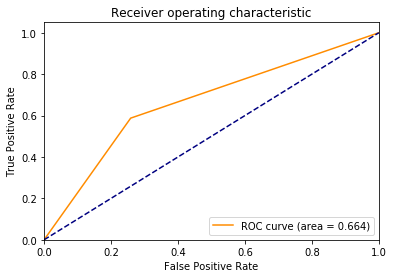

In [36]:
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

#plt.figure()
plt.plot(fpr, tpr, color='darkorange', 
         label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [37]:
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))

ROC score : 65.358293



In [38]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_classifier =GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_pred=nb_classifier.predict(x_test)
print(y_pred)

[0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


In [40]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))


Accuracy score: 74.409449
Recall score : 65.217391
ROC score : 72.423510



In [41]:
nb_acc = cross_val_score(nb_classifier, x_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
nb_acc

array([0.79, 0.76, 0.78])

In [42]:
probas = clf.predict_proba(x_test)

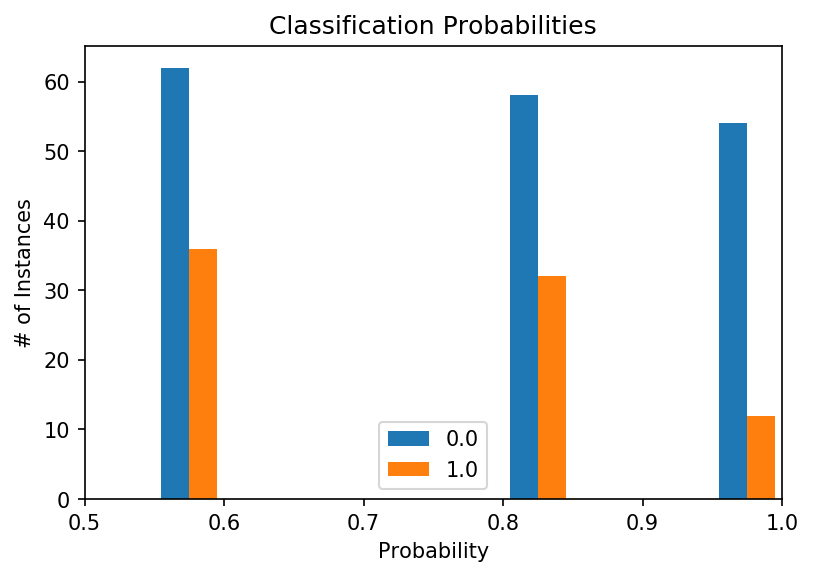

In [43]:
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(y_test)
plt.show()

In [44]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)


dtc_clf_acc = cross_val_score(dtc_clf, x_train, y_train, cv=3, scoring="accuracy",  n_jobs=-1)

dtc_proba = cross_val_predict(dtc_clf, x_train, y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]

In [45]:
y_pred=dtc_clf.predict(x_test)
print(y_pred)

[0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [46]:
print(y_pred)

[0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [47]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 71.653543
Recall score : 57.608696
ROC score : 68.619163

[[129  33]
 [ 39  53]]


In [48]:
#Random Forest Calssifier

from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rmf_clf = rmf.fit(x_train, y_train)

In [49]:
rmf_clf_acc = cross_val_score(rmf_clf, x_train, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, x_train, y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]

In [50]:
y_pred=rmf.predict(x_test)
print(y_pred)

[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [51]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 72.047244
Recall score : 44.565217
ROC score : 66.109769

[[142  20]
 [ 51  41]]


In [52]:
#GRID SEARCH

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)

In [53]:
knn_gs.fit(x_train, y_train)

C:\Users\sepals04\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 10}


In [55]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(x_train, y_train)

C:\Users\sepals04\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [56]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 100}


In [57]:
from sklearn.linear_model import LogisticRegression
#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
#test the three models with the test data and print their accuracy scores
print('knn: {}'.format(knn_best.score(x_test, y_test)))
print('rf: {}'.format(rf_best.score(x_test, y_test)))
print('log_reg: {}'.format(log_reg.score(x_test, y_test)))

knn: 0.7480314960629921
rf: 0.7755905511811023
log_reg: 0.7559055118110236


In [59]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [60]:
#fit model to training data
ensemble.fit(x_train, y_train)
#test our model on the test data
ensemble.score(x_test, y_test)

0.7755905511811023

In [61]:
##BAGGING 
import pandas as pd
from sklearn import model_selection

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('C:/Users/sepals04/Desktop/Pro. New/CLAASIFICATION/diabetes.csv')
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.770745044429255


In [62]:
# AdaBoost Classification
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

df = pd.read_csv('diabetes.csv')
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.760457963089542


In [63]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv('diabetes.csv')
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7681989063568012


In [70]:
##PIPELINING

#load the libraries we have been using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2,random_state=7)
print(cv)

StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None)


In [73]:
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2),LogisticRegression(random_state=1))
pipe_lr.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=1, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [74]:
##saving Model using Pickle

import pickle 
  
saved_model = pickle.dumps(pipe_lr) 
  
from_pickle = pickle.loads(saved_model) 
  
y_pred = from_pickle.predict(x_test) 

print('Test Accuracy: %.3f' % pipe_lr.score(x_test, y_test))

Test Accuracy: 0.701


In [75]:
##JOBLIB

from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(pipe_lr, 'filename.pkl') 
  
# Load the model from the file 
from_joblib = joblib.load('filename.pkl')  
  
# Use the loaded model to make predictions 
y_pred = from_joblib.predict(x_test) 

print('Test Accuracy: %.3f' % pipe_lr.score(x_test, y_test))

Test Accuracy: 0.701


In [76]:
y_pred = pipe_lr.predict(x_test)
print('Test Accuracy: %.3f' % pipe_lr.score(x_test, y_test))

Test Accuracy: 0.701


In [77]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10,random_state=1).split(x_train,y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(x_train[train], y_train[train])
    score = pipe_lr.score(x_train[test], y_train[test])
    scores.append(score)
    print('\nCV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    


CV accuracy: 0.712 +/- 0.000

CV accuracy: 0.740 +/- 0.029

CV accuracy: 0.756 +/- 0.033

CV accuracy: 0.736 +/- 0.046

CV accuracy: 0.723 +/- 0.048

CV accuracy: 0.734 +/- 0.050

CV accuracy: 0.738 +/- 0.048

CV accuracy: 0.732 +/- 0.048

CV accuracy: 0.728 +/- 0.046

CV accuracy: 0.733 +/- 0.046


In [78]:
##CROSS VAIDATION

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=x_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.71 0.77 0.79 0.67 0.67 0.79 0.76 0.69 0.7  0.78]
CV accuracy: 0.733 +/- 0.046


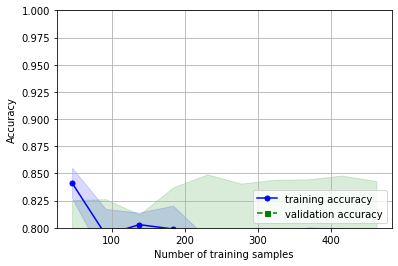

In [79]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, 
                                                          X=x_train, y=y_train, 
                                                train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

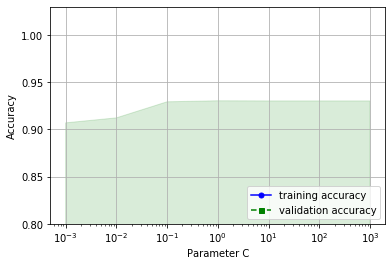

In [80]:
##Addressing over- and underfitting with validation curves

from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=x_train,y=y_train,param_name='logisticregression__C',param_range=param_range,cv=100)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()


In [81]:
##Fine-tuning machine learning models via grid search using SVC

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']}, {'svc__C': param_range, 'svc__gamma': param_range,'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7762645914396887
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


C:\Users\sepals04\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [82]:
clf = gs.best_estimator_
clf.fit(x_train, y_train)
print('Test accuracy: %.3f' % clf.score(x_test, y_test))

Test accuracy: 0.772


In [83]:
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid, scoring='accuracy', cv=2)
scores = cross_val_score(gs, x_train, y_train,scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

C:\Users\sepals04\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CV accuracy: 0.769 +/- 0.026


In [84]:
##Fine-tuning machine learning models via grid search using DT

from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],scoring='accuracy',cv=2)
scores = cross_val_score(gs, x_train, y_train,scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.743 +/- 0.042
